In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import yaml

In [2]:
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix, vstack
from scipy.sparse.linalg import svds
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, normalize

In [3]:
pip install spotipy

In [6]:
# To create a playlist and add tracks
import spotipy
from spotipy.oauth2 import SpotifyOAuth

In [7]:
playlist_df = pd.read_pickle("playlist_tracks.pkl")

In [8]:
playlist_df.columns

Index([                'id',               'name',         'popularity',
                     'type',           'is_local',           'explicit',
              'duration_ms',        'disc_number',       'track_number',
                'artist_id',        'artist_name',    'album_artist_id',
        'album_artist_name',           'album_id',         'album_name',
       'album_release_date',       'album_tracks',         'album_type',
              'playlist_id',      'playlist_name',    'playlist_tracks',
                 'added_at',           'added_by',             'genres',
             'album_genres',                    0],
      dtype='object')

In [8]:
import plotly.express as px

# Group by artist_name and count the number of tracks for each artist
artist_counts = playlist_df['artist_name'].value_counts().reset_index()
artist_counts.columns = ['Artist', 'Track Count']

# Plotting top artists
fig_artists = px.bar(artist_counts.head(10), x='Artist', y='Track Count', title='Top 10 Artists with Most Tracks in the Playlist')

fig_artists.show()

In [9]:
import plotly.express as px

# Grouping by 'album_name' and counting the number of tracks for each album
album_counts = playlist_df['album_name'].value_counts().reset_index()
album_counts.columns = ['Album Name', 'Number of Tracks']

# Plotting the top albums with the most tracks in the playlist
fig_albums = px.bar(album_counts.head(10), x='Album Name', y='Number of Tracks', title='Top Albums with Most Tracks in the Playlist')
fig_albums.show()

In [10]:
# Grouping the dataframe by playlist_name and computing the average popularity for tracks in each playlist
average_popularity = playlist_df.groupby('playlist_name')['popularity'].mean().sort_values(ascending=False)

# Create a bar plot
import plotly.express as px

fig = px.bar(average_popularity, x=average_popularity.index, y=average_popularity.values, title="Average Popularity of Tracks by Playlist", labels={"y": "Average Popularity", "index": "Playlist Name"})
fig.show()


In [11]:
top_artist_df = pd.read_pickle("top_artists.pkl")
#followed_artists_df = pd.read_pickle("followed_artists.pkl")

In [12]:
top_artist_df.head()

,id,uri,type,name,genres,followers
0,1wRPtKGflJrBx9BmLsSwlU,spotify:artist:1wRPtKGflJrBx9BmLsSwlU,artist,Pritam,"[filmi, indian instrumental, modern bollywood]",0
1,06HL4z0CvFAxyc27GXpf02,spotify:artist:06HL4z0CvFAxyc27GXpf02,artist,Taylor Swift,[pop],0
2,6ltzsmQQbmdoHHbLZ4ZN25,spotify:artist:6ltzsmQQbmdoHHbLZ4ZN25,artist,Lord Huron,"[indie folk, stomp and holler]",0
3,7qjJw7ZM2ekDSahLXPjIlN,spotify:artist:7qjJw7ZM2ekDSahLXPjIlN,artist,Sid Sriram,[filmi],0
4,1mYsTxnqsietFxj1OgoGbG,spotify:artist:1mYsTxnqsietFxj1OgoGbG,artist,A.R. Rahman,[filmi],0


In [13]:
import pandas as pd
import plotly.express as px

# Load the pickle file for top artists
top_artists_df = pd.read_pickle("top_artists.pkl")

# Group the data by genre and count the number of artists in each genre
genre_counts = top_artists_df['genres'].explode().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Artist Count']

# Create a bar chart to show the distribution of artists by genre
genre_fig = px.bar(
    genre_counts,
    x='Genre',
    y='Artist Count',
    title='Top Artists by Genre',
    labels={'Artist Count': 'Number of Artists'},
)

# Sort the genres by artist count in descending order
genre_fig.update_xaxes(categoryorder='total descending')

# Display the interactive plot
genre_fig.show()



In [14]:
followed_artists_df = pd.read_pickle("followed_artists.pkl")

In [15]:
followed_artists_df.head()

,id,uri,type,name,genres,followers
0,0oOet2f43PA68X5RxKobEy,spotify:artist:0oOet2f43PA68X5RxKobEy,artist,Shreya Ghoshal,"[filmi, modern bollywood]",20391139
1,1mYsTxnqsietFxj1OgoGbG,spotify:artist:1mYsTxnqsietFxj1OgoGbG,artist,A.R. Rahman,[filmi],40283273
2,4gzpq5DPGxSnKTe4SA8HAU,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,artist,Coldplay,"[permanent wave, pop]",47713116
3,5OTt6O4Q22YsqZDaWV6FqC,spotify:artist:5OTt6O4Q22YsqZDaWV6FqC,artist,Bombay Jayashri,"[carnatic, carnatic vocal, filmi, indian class...",481946
4,5pUo3fmmHT8bhCyHE52hA6,spotify:artist:5pUo3fmmHT8bhCyHE52hA6,artist,Liam Payne,[pop],10281849


In [16]:
top_tracks_df = pd.read_pickle("top_tracks.pkl")

In [17]:
top_tracks_df.head()

,id,name,popularity,type,is_local,explicit,duration_ms,disc_number,track_number,artist_id,...,album_artist_id,album_artist_name,album_id,album_name,album_release_date,album_tracks,album_type,genres,album_genres,0
0,1fnyJEbolobEfv2gtLVjmA,Kabhi Na Kabhi,54,track,False,False,376049,1,5,4Z0t0LHjOjFRiv0mjBw206,...,1Fp2NbOlCFFrrkc29QbhBC,Chirantan Bhatt,63LMMLbw96iKJ2pSsJuatw,Shaapit: The Cursed,2010-02-09,7,album,"[filmi, modern bollywood]",[],"{'danceability': 0.724, 'energy': 0.684, 'key'..."
1,5iydgkuP2lJFDT9CgyY26x,Jaadui,54,track,False,False,222375,1,5,1wRPtKGflJrBx9BmLsSwlU,...,1wRPtKGflJrBx9BmLsSwlU,Pritam,1t1gWslYejaaqicumEbdKU,Tu Jhoothi Main Makkaar,2023-03-16,6,album,"[filmi, indian instrumental, modern bollywood]","[filmi, indian instrumental, modern bollywood]","{'danceability': 0.589, 'energy': 0.419, 'key'..."
2,4i4PJCJ0DYyUfXVHLS4fYU,Piharva,35,track,False,False,430967,1,1,1nmKYy6efdYl8sIcT0gCLJ,...,1nmKYy6efdYl8sIcT0gCLJ,Anumita Nadesan,1RGxnno01axq8lp4TTdwhn,Piharva,2022-02-14,1,album,"[desi pop, indian indie, indian singer-songwri...","[desi pop, indian indie, indian singer-songwri...","{'danceability': 0.341, 'energy': 0.594, 'key'..."
3,34Tp5CGIrrqIZ5bJcc2Lc3,Alai Alaiyaaga - Extended Version,27,track,False,False,179585,1,12,0LSPREIgGMZXCuKVel7LVD,...,0LyfQWJT6nXafLPZqxe9Of,Various Artists,6D95duFqeI9jThSo6UnVfF,Navarasa (Original Motion Picture Soundtrack),2022-02-14,12,album,[filmi],[],"{'danceability': 0.362, 'energy': 0.2, 'key': ..."
4,3pHkh7d0lzM2AldUtz2x37,The Archer,83,track,False,False,211240,1,5,06HL4z0CvFAxyc27GXpf02,...,06HL4z0CvFAxyc27GXpf02,Taylor Swift,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18,album,[pop],[pop],"{'danceability': 0.292, 'energy': 0.574, 'key'..."


In [18]:
top_tracks_df.columns

Index([                'id',               'name',         'popularity',
                     'type',           'is_local',           'explicit',
              'duration_ms',        'disc_number',       'track_number',
                'artist_id',        'artist_name',    'album_artist_id',
        'album_artist_name',           'album_id',         'album_name',
       'album_release_date',       'album_tracks',         'album_type',
                   'genres',       'album_genres',                    0],
      dtype='object')

In [19]:
#top_tracks_df[0]
features_df = top_tracks_df[0].apply(pd.Series)


In [20]:
features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.724,0.684,1,-5.766,0,0.0306,0.658,0.000116,0.1080,0.609,112.005,audio_features,1fnyJEbolobEfv2gtLVjmA,spotify:track:1fnyJEbolobEfv2gtLVjmA,https://api.spotify.com/v1/tracks/1fnyJEbolobE...,https://api.spotify.com/v1/audio-analysis/1fny...,376050,4
1,0.589,0.419,7,-10.485,1,0.0265,0.866,0.000009,0.1360,0.437,102.973,audio_features,5iydgkuP2lJFDT9CgyY26x,spotify:track:5iydgkuP2lJFDT9CgyY26x,https://api.spotify.com/v1/tracks/5iydgkuP2lJF...,https://api.spotify.com/v1/audio-analysis/5iyd...,222376,4
2,0.341,0.594,3,-10.238,1,0.0445,0.670,0.035300,0.0724,0.153,93.007,audio_features,4i4PJCJ0DYyUfXVHLS4fYU,spotify:track:4i4PJCJ0DYyUfXVHLS4fYU,https://api.spotify.com/v1/tracks/4i4PJCJ0DYyU...,https://api.spotify.com/v1/audio-analysis/4i4P...,430968,4
3,0.362,0.200,2,-12.603,0,0.0372,0.926,0.000000,0.1190,0.457,143.226,audio_features,34Tp5CGIrrqIZ5bJcc2Lc3,spotify:track:34Tp5CGIrrqIZ5bJcc2Lc3,https://api.spotify.com/v1/tracks/34Tp5CGIrrqI...,https://api.spotify.com/v1/audio-analysis/34Tp...,179585,4
4,0.292,0.574,0,-9.375,1,0.0401,0.120,0.005690,0.0663,0.166,124.344,audio_features,3pHkh7d0lzM2AldUtz2x37,spotify:track:3pHkh7d0lzM2AldUtz2x37,https://api.spotify.com/v1/tracks/3pHkh7d0lzM2...,https://api.spotify.com/v1/audio-analysis/3pHk...,211240,4


In [21]:
saved_tracks_df = pd.read_pickle("saved_tracks.pkl")

In [22]:
saved_tracks_df.head()

,id,name,popularity,type,is_local,explicit,duration_ms,disc_number,track_number,artist_id,...,album_artist_name,album_id,album_name,album_release_date,album_tracks,album_type,added_at,genres,album_genres,0
0,3wwLWFRLiReDf5AqgmAJwT,Heer Ranjha,76,track,False,False,223107,1,1,63QHbwCDdJ50C72D4ojeo1,...,Rito Riba,5jZOJxJvZj63YKrPEWPy63,Heer Ranjha,2022-10-18,1,album,2023-09-24T08:15:00Z,[arunachal indie],[arunachal indie],"{'danceability': 0.576, 'energy': 0.72, 'key':..."
1,5cfKBuE5XKtlaNOVjQwA9H,"Kadhaippoma (From ""Oh My Kadavule"")",69,track,False,False,282208,1,1,0wv5i0ds2z040yx7oL6UZy,...,Leon James,0XEhNGVpjOxDoi8ByFyPFR,"Kadhaippoma (From ""Oh My Kadavule"")",2020-01-03,1,album,2023-09-24T08:14:44Z,[tamil pop],[tamil pop],"{'danceability': 0.575, 'energy': 0.577, 'key'..."
2,7cWnks0lsRtpAi87COOiXK,O Re Piya,74,track,False,False,379768,1,4,6ohaQzKaXrobAL8paLSaxq,...,Salim–Sulaiman,4ONIL6w6cUj2ArNYM6V4CL,Aaja Nachle,2007-10-18,9,album,2023-09-15T01:02:50Z,"[filmi, indian folk, modern bollywood]","[filmi, indian folk, modern bollywood]","{'danceability': 0.586, 'energy': 0.532, 'key'..."
3,1JIra9cWx8yIZwvjfJlArx,Mora Rasan,8,track,False,False,249428,1,1,1hxuMlq1xCyjGyhoPsiIM0,...,Krameri,14tGUk4y0r44nRCMIJaiQP,Mora Rasan,2023-08-17,1,album,2023-08-31T23:30:35Z,[indian indie],[indian indie],"{'danceability': 0.526, 'energy': 0.246, 'key'..."
4,0xHvmWCpz9Pnn1sDvRehAs,Channa Mereya - Unplugged,61,track,False,False,165333,1,8,1wRPtKGflJrBx9BmLsSwlU,...,Pritam,5xjaz957o6YGSXmlfd2tex,Ae Dil Hai Mushkil (Original Motion Picture So...,2016-10-26,9,album,2023-08-23T06:25:34Z,"[filmi, indian instrumental, modern bollywood]","[filmi, indian instrumental, modern bollywood]","{'danceability': 0.537, 'energy': 0.251, 'key'..."


In [23]:
saved_tracks_df.columns

Index([                'id',               'name',         'popularity',
                     'type',           'is_local',           'explicit',
              'duration_ms',        'disc_number',       'track_number',
                'artist_id',        'artist_name',    'album_artist_id',
        'album_artist_name',           'album_id',         'album_name',
       'album_release_date',       'album_tracks',         'album_type',
                 'added_at',             'genres',       'album_genres',
                          0],
      dtype='object')

<ipython-input-24-dd6c59399541>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



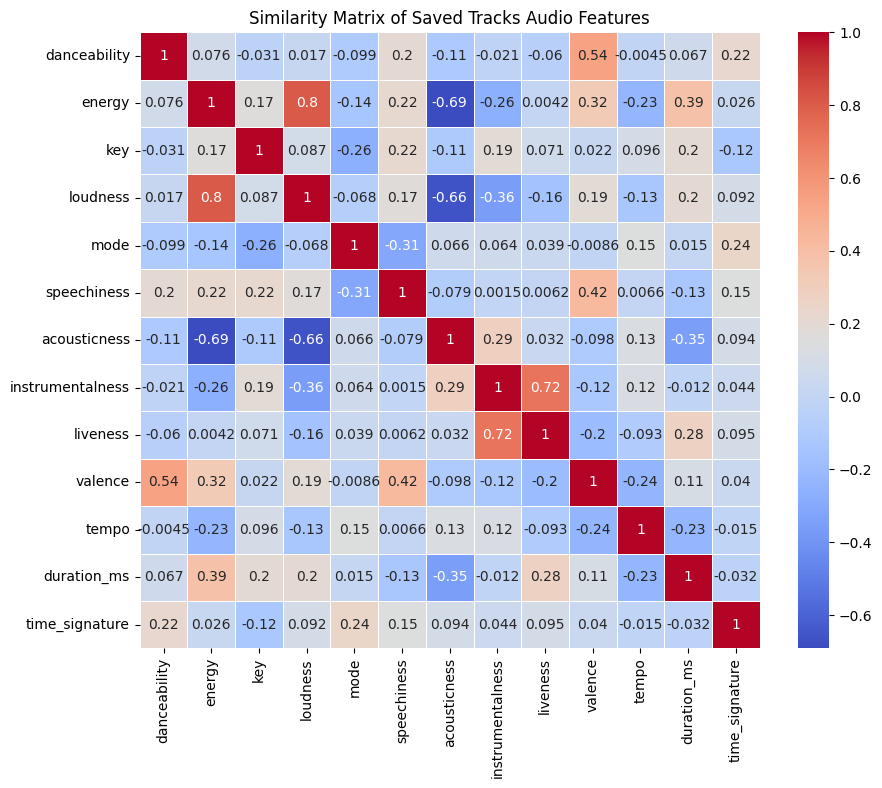

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract audio features from the 'saved_tracks_df[0]' column
audio_features = saved_tracks_df[0].apply(pd.Series)

# Calculate the similarity matrix (cosine similarity)
similarity_matrix = audio_features.corr()

# Create a heatmap to visualize the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Similarity Matrix of Saved Tracks Audio Features')
plt.show()



In [25]:
import pandas as pd
import plotly.express as px

# Load the pickle files
top_tracks_df = pd.read_pickle("top_tracks.pkl")
top_artists_df = pd.read_pickle("top_artists.pkl")

# Get the top 10 most played songs
top_10_tracks = top_tracks_df.head(10)

# Create a bar chart for the top 10 tracks
track_fig = px.bar(
    top_10_tracks,
    x='name',
    y='popularity',
    title='Top 10 Most Played Songs',
    labels={'popularity': 'Popularity Score'},
    hover_data=['name'],  # Specify 'artists' as hover data
)

# Get the top 10 most followed artists
top_10_artists = followed_artists_df.head(10)

# Create a bar chart for the top 10 artists
artist_fig = px.bar(
    top_10_artists,
    x='name',
    y='followers',
    title='Top 10 Most Followed Artists',
    labels={'followers': 'Followers Count'},
)

# Display the interactive plots
track_fig.show()
artist_fig.show()


In [26]:
playlist_df['popularity'] = playlist_df['popularity'] / 100  # normalise popularity feature between 0 and 1
playlist_df.head()

,id,name,popularity,type,is_local,explicit,duration_ms,disc_number,track_number,artist_id,...,album_tracks,album_type,playlist_id,playlist_name,playlist_tracks,added_at,added_by,genres,album_genres,0
0,3AVrVz5rK8Hrqo9YGiVGN5,Apocalypse,0.70,track,False,False,290146.0,1.0,4.0,1QAJqy2dA3ihHBFIHRphZj,...,10.0,album,4ez3UAaC2kTRmZeotAt7Pv,cigaarettes*after*sex*,11.0,2022-08-13T04:49:54Z,{'external_urls': {'spotify': 'https://open.sp...,"[ambient pop, dream pop, el paso indie, shoegaze]","[ambient pop, dream pop, el paso indie, shoegaze]","{'danceability': 0.369, 'energy': 0.467, 'key'..."
1,69UqtTHfUKAJweQwEStRzC,Sunsetz,0.66,track,False,False,214680.0,1.0,3.0,1QAJqy2dA3ihHBFIHRphZj,...,10.0,album,4ez3UAaC2kTRmZeotAt7Pv,cigaarettes*after*sex*,11.0,2022-08-13T04:50:02Z,{'external_urls': {'spotify': 'https://open.sp...,"[ambient pop, dream pop, el paso indie, shoegaze]","[ambient pop, dream pop, el paso indie, shoegaze]","{'danceability': 0.412, 'energy': 0.477, 'key'..."
2,1Bh0UzthW8pKEnYg7v40Oa,Heavenly,0.58,track,False,False,288595.0,1.0,3.0,1QAJqy2dA3ihHBFIHRphZj,...,9.0,album,4ez3UAaC2kTRmZeotAt7Pv,cigaarettes*after*sex*,11.0,2022-08-13T04:50:10Z,{'external_urls': {'spotify': 'https://open.sp...,"[ambient pop, dream pop, el paso indie, shoegaze]","[ambient pop, dream pop, el paso indie, shoegaze]","{'danceability': 0.539, 'energy': 0.431, 'key'..."
3,0dBQm6NsxCQ1cOwR4zWw89,Don't Let Me Go,0.49,track,False,False,262560.0,1.0,1.0,1QAJqy2dA3ihHBFIHRphZj,...,9.0,album,4ez3UAaC2kTRmZeotAt7Pv,cigaarettes*after*sex*,11.0,2022-08-13T04:50:14Z,{'external_urls': {'spotify': 'https://open.sp...,"[ambient pop, dream pop, el paso indie, shoegaze]","[ambient pop, dream pop, el paso indie, shoegaze]","{'danceability': 0.404, 'energy': 0.37, 'key':..."
4,3VSYkAf6f46i5ZkXOHORq1,Sweet,0.62,track,False,False,291640.0,1.0,6.0,1QAJqy2dA3ihHBFIHRphZj,...,10.0,album,4ez3UAaC2kTRmZeotAt7Pv,cigaarettes*after*sex*,11.0,2023-04-15T11:06:26Z,{'external_urls': {'spotify': 'https://open.sp...,"[ambient pop, dream pop, el paso indie, shoegaze]","[ambient pop, dream pop, el paso indie, shoegaze]","{'danceability': 0.448, 'energy': 0.511, 'key'..."


In [12]:
with open("playlists.yml", 'r') as stream:
    playlist_ids = yaml.safe_load(stream)

In [13]:
playlist_df.head()

,id,name,popularity,type,is_local,explicit,duration_ms,disc_number,track_number,artist_id,...,album_tracks,album_type,playlist_id,playlist_name,playlist_tracks,added_at,added_by,genres,album_genres,0
0,3AVrVz5rK8Hrqo9YGiVGN5,Apocalypse,70.0,track,False,False,290146.0,1.0,4.0,1QAJqy2dA3ihHBFIHRphZj,...,10.0,album,4ez3UAaC2kTRmZeotAt7Pv,cigaarettes*after*sex*,11.0,2022-08-13T04:49:54Z,{'external_urls': {'spotify': 'https://open.sp...,"[ambient pop, dream pop, el paso indie, shoegaze]","[ambient pop, dream pop, el paso indie, shoegaze]","{'danceability': 0.369, 'energy': 0.467, 'key'..."
1,69UqtTHfUKAJweQwEStRzC,Sunsetz,66.0,track,False,False,214680.0,1.0,3.0,1QAJqy2dA3ihHBFIHRphZj,...,10.0,album,4ez3UAaC2kTRmZeotAt7Pv,cigaarettes*after*sex*,11.0,2022-08-13T04:50:02Z,{'external_urls': {'spotify': 'https://open.sp...,"[ambient pop, dream pop, el paso indie, shoegaze]","[ambient pop, dream pop, el paso indie, shoegaze]","{'danceability': 0.412, 'energy': 0.477, 'key'..."
2,1Bh0UzthW8pKEnYg7v40Oa,Heavenly,58.0,track,False,False,288595.0,1.0,3.0,1QAJqy2dA3ihHBFIHRphZj,...,9.0,album,4ez3UAaC2kTRmZeotAt7Pv,cigaarettes*after*sex*,11.0,2022-08-13T04:50:10Z,{'external_urls': {'spotify': 'https://open.sp...,"[ambient pop, dream pop, el paso indie, shoegaze]","[ambient pop, dream pop, el paso indie, shoegaze]","{'danceability': 0.539, 'energy': 0.431, 'key'..."
3,0dBQm6NsxCQ1cOwR4zWw89,Don't Let Me Go,49.0,track,False,False,262560.0,1.0,1.0,1QAJqy2dA3ihHBFIHRphZj,...,9.0,album,4ez3UAaC2kTRmZeotAt7Pv,cigaarettes*after*sex*,11.0,2022-08-13T04:50:14Z,{'external_urls': {'spotify': 'https://open.sp...,"[ambient pop, dream pop, el paso indie, shoegaze]","[ambient pop, dream pop, el paso indie, shoegaze]","{'danceability': 0.404, 'energy': 0.37, 'key':..."
4,3VSYkAf6f46i5ZkXOHORq1,Sweet,62.0,track,False,False,291640.0,1.0,6.0,1QAJqy2dA3ihHBFIHRphZj,...,10.0,album,4ez3UAaC2kTRmZeotAt7Pv,cigaarettes*after*sex*,11.0,2023-04-15T11:06:26Z,{'external_urls': {'spotify': 'https://open.sp...,"[ambient pop, dream pop, el paso indie, shoegaze]","[ambient pop, dream pop, el paso indie, shoegaze]","{'danceability': 0.448, 'energy': 0.511, 'key'..."


In [14]:
playlist_features=playlist_df[0].apply(pd.Series)
playlist_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,0
0,0.369,0.467,5.0,-9.018,1.0,0.0274,0.0194,0.460000,0.1090,0.174,94.473,audio_features,3AVrVz5rK8Hrqo9YGiVGN5,spotify:track:3AVrVz5rK8Hrqo9YGiVGN5,https://api.spotify.com/v1/tracks/3AVrVz5rK8Hr...,https://api.spotify.com/v1/audio-analysis/3AVr...,290147.0,4.0,NaN
1,0.412,0.477,9.0,-9.381,0.0,0.0290,0.0542,0.798000,0.0975,0.141,75.302,audio_features,69UqtTHfUKAJweQwEStRzC,spotify:track:69UqtTHfUKAJweQwEStRzC,https://api.spotify.com/v1/tracks/69UqtTHfUKAJ...,https://api.spotify.com/v1/audio-analysis/69Uq...,214680.0,4.0,NaN
2,0.539,0.431,8.0,-9.298,1.0,0.0249,0.6280,0.653000,0.1100,0.122,105.156,audio_features,1Bh0UzthW8pKEnYg7v40Oa,spotify:track:1Bh0UzthW8pKEnYg7v40Oa,https://api.spotify.com/v1/tracks/1Bh0UzthW8pK...,https://api.spotify.com/v1/audio-analysis/1Bh0...,288595.0,4.0,NaN
3,0.404,0.370,6.0,-9.603,1.0,0.0265,0.4520,0.519000,0.0982,0.162,98.655,audio_features,0dBQm6NsxCQ1cOwR4zWw89,spotify:track:0dBQm6NsxCQ1cOwR4zWw89,https://api.spotify.com/v1/tracks/0dBQm6NsxCQ1...,https://api.spotify.com/v1/audio-analysis/0dBQ...,262560.0,3.0,NaN
4,0.448,0.511,6.0,-9.084,1.0,0.0274,0.3620,0.823000,0.1290,0.112,96.321,audio_features,3VSYkAf6f46i5ZkXOHORq1,spotify:track:3VSYkAf6f46i5ZkXOHORq1,https://api.spotify.com/v1/tracks/3VSYkAf6f46i...,https://api.spotify.com/v1/audio-analysis/3VSY...,291640.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0.699,0.529,2.0,-7.548,1.0,0.0487,0.0317,0.000036,0.2850,0.121,119.987,audio_features,3DmW6y7wTEYHJZlLo1r6XJ,spotify:track:3DmW6y7wTEYHJZlLo1r6XJ,https://api.spotify.com/v1/tracks/3DmW6y7wTEYH...,https://api.spotify.com/v1/audio-analysis/3DmW...,206167.0,4.0,NaN
877,0.456,0.843,1.0,-2.724,1.0,0.0595,0.0369,0.000000,0.0453,0.560,161.844,audio_features,65YThnxDm8OZPT6vdSwqbT,spotify:track:65YThnxDm8OZPT6vdSwqbT,https://api.spotify.com/v1/tracks/65YThnxDm8OZ...,https://api.spotify.com/v1/audio-analysis/65YT...,240307.0,4.0,NaN
878,0.864,0.610,11.0,-5.657,0.0,0.1200,0.0764,0.000000,0.4510,0.381,101.059,audio_features,6uNH2vSbx46GKXu2cDLvT4,spotify:track:6uNH2vSbx46GKXu2cDLvT4,https://api.spotify.com/v1/tracks/6uNH2vSbx46G...,https://api.spotify.com/v1/audio-analysis/6uNH...,182079.0,4.0,NaN
879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
playlist_df.columns

Index([                'id',               'name',         'popularity',
                     'type',           'is_local',           'explicit',
              'duration_ms',        'disc_number',       'track_number',
                'artist_id',        'artist_name',    'album_artist_id',
        'album_artist_name',           'album_id',         'album_name',
       'album_release_date',       'album_tracks',         'album_type',
              'playlist_id',      'playlist_name',    'playlist_tracks',
                 'added_at',           'added_by',             'genres',
             'album_genres',                    0],
      dtype='object')

In [19]:
import plotly.express as px

# Group by artist_name and count the number of tracks for each artist
artist_counts = playlist_df['artist_name'].value_counts().reset_index()
artist_counts.columns = ['Artist', 'Track Count']

# Plotting top artists
fig_artists = px.bar(artist_counts.head(10), x='Artist', y='Track Count', title='Top 10 Artists with Most Tracks in the Playlist')

fig_artists.show()

In [30]:
import plotly.express as px

# Grouping by 'album_name' and counting the number of tracks for each album
album_counts = playlist_df['album_name'].value_counts().reset_index()
album_counts.columns = ['Album Name', 'Number of Tracks']

# Plotting the top albums with the most tracks in the playlist
fig_albums = px.bar(album_counts.head(10), x='Album Name', y='Number of Tracks', title='Top Albums with Most Tracks in the Playlist')
fig_albums.show()

In [31]:
# Grouping the dataframe by playlist_name and computing the average popularity for tracks in each playlist
average_popularity = playlist_df.groupby('playlist_name')['popularity'].mean().sort_values(ascending=False)

# Create a bar plot
import plotly.express as px

fig = px.bar(average_popularity, x=average_popularity.index, y=average_popularity.values, title="Average Popularity of Tracks by Playlist", labels={"y": "Average Popularity", "index": "Playlist Name"})
fig.show()

In [38]:
import plotly.express as px

# Counting the number of occurrences of each unique 'playlist_name'
tracks_per_playlist = playlist_df['playlist_name'].value_counts().sort_values(ascending=False)

# Creating the bar chart
fig = px.bar(tracks_per_playlist,
             x=tracks_per_playlist.index,
             y=tracks_per_playlist.values,
             title="Number of Tracks by Playlist",
             labels={"y": "Number of Tracks", "index": "Playlist Name"})

fig.show()


In [9]:
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix, vstack
from scipy.sparse.linalg import svds
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, normalize


##Popularity recommender: Sorting the tracks in a particluar playlist by their popularity and that is your recommendation

In [16]:
def get_interacted_tracks(tracks, playlist_id, drop_duplicates=True):
    interacted_track_ids = set(tracks[tracks['playlist_id'] == playlist_id]['id'])
    tracks_interacted = tracks[tracks['id'].isin(interacted_track_ids)]
    tracks_not_interacted = tracks[~tracks['id'].isin(interacted_track_ids)]

    if drop_duplicates is True:
        tracks_interacted = tracks_interacted.drop_duplicates(subset='id', keep="first").reset_index()
        tracks_not_interacted = tracks_not_interacted.drop_duplicates(subset='id', keep="first").reset_index()

    return tracks_interacted, tracks_not_interacted

In [17]:
interacted_tracks, non_interacted_tracks = get_interacted_tracks(playlist_df, playlist_ids['Weird mix'])

In [18]:
class PopularityRecommender:

    def __init__(self, tracks):
        self.tracks = tracks
        self.model_name = 'Popularity Recommender'

    def recommend_tracks(self, playlist_id, ignore_ids=[]):
        recommendations_df = self.tracks[~self.tracks['id'].isin(ignore_ids)] \
                                .drop_duplicates(subset='id', keep="first").reset_index() \
                                .sort_values('popularity', ascending=False)

        return recommendations_df

popularity_model = PopularityRecommender(playlist_df)

In [19]:
# You can see this is essentially sorted by popularity
popularity_model_recommendations = popularity_model.recommend_tracks(playlist_ids['Weird mix'], interacted_tracks['id'].tolist())
popularity_model_recommendations[['id', 'name', 'artist_name', 'album_name', 'popularity']].head()

,id,name,artist_name,album_name,popularity
231,4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,Harry's House,95.0
254,7DSAEUvxU8FajXtRloy8M0,Flowers,Miley Cyrus,Endless Summer Vacation,92.0
235,3JvKfv6T31zO0ini8iNItO,Another Love,Tom Odell,Long Way Down (Deluxe),92.0
225,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,Harry Styles,Fine Line,89.0
180,5O2P9iiztwhomNh8xkR9lJ,Night Changes,One Direction,FOUR (Deluxe),89.0


## Content Based Recommender

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
def get_tfidf(tracks, ngram_range=(1,2), min_df=0.003, max_df=0.5, max_features=5000):
    # Transform list cols to string, we use bigrams later so no need to remove spaces
    tracks['genres_str'] = tracks['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

    # Vector size 5000 model
    vectorizer = TfidfVectorizer(analyzer='word',
                                 ngram_range=ngram_range,
                                 min_df=min_df,
                                 max_df=max_df,
                                 max_features=max_features,
                                 stop_words=stopwords.words('english'))  # might need to download stopwords, follow prompt

    # Don't include album_genres column here as similar to genres column and we don't want additional genre weighting in this case
    # vectorizer.fit_transform takes a string
    tracks['name'].fillna("", inplace=True)
    tracks['artist_name'].fillna("", inplace=True)
    tracks['album_name'].fillna("", inplace=True)
    tracks['playlist_name'].fillna("", inplace=True)
    tracks['genres_str'].fillna("", inplace=True)
    tfidf_matrix = vectorizer.fit_transform(tracks['name'] + ' ' +
                                            tracks['artist_name'] + ' ' +
                                            tracks['album_name'] + ' ' +
                                            tracks['playlist_name'] + ' ' +
                                            tracks['genres_str']
                                           )
    tfidf_feature_names = vectorizer.get_feature_names_out()

    return tfidf_matrix, tfidf_feature_names

In [22]:
tfidf_matrix, tfidf_feature_names = get_tfidf(playlist_df)
tfidf_matrix

<880x935 sparse matrix of type '<class 'numpy.float64'>'
	with 11231 stored elements in Compressed Sparse Row format>

In [23]:
def get_track_profile(tracks, track_id, tfidf_matrix):
    track_id_str = str(track_id)
    idx = tracks['id'].tolist().index(track_id)
    track_profile = tfidf_matrix[idx:idx+1]
    return track_profile

def get_track_profiles(tracks, track_ids, tfidf_matrix):
    track_profiles_list = [get_track_profile(tracks, x, tfidf_matrix) for x in track_ids]
    track_profiles = vstack(track_profiles_list)
    return track_profiles

def build_playlists_profile(tracks, playlist_id, interactions_indexed_df, tfidf_matrix):
    # There isn't any weighting we want to do in this case,
    # but a common approach is weighting by interaction strength (liking, commenting, etc.)
    interaction_tracks_df = interactions_indexed_df.loc[playlist_id]  # duplicate interacted tracks, filter to current playlist
    if isinstance(interaction_tracks_df, pd.DataFrame):
        track_ids = interaction_tracks_df['id'].tolist()
    else:
        track_ids = [interaction_tracks_df['id']]
    playlist_track_profiles = get_track_profiles(tracks, track_ids, tfidf_matrix)
    # Weighted average for event strengths
#     playlist_track_strengths = np.array(interaction_tracks_df['event_strength']).reshape(-1,1)
#     playlist_track_profiles_array = np.sum(playlist_track_profiles.multiply(playlist_track_strengths), axis=0) / np.sum(playlist_track_strengths)
    playlist_track_profiles_array = np.sum(playlist_track_profiles, axis=0)  # Flattens no_tracksx948 matrix to 1x948 array
    playlist_track_profiles_norm = normalize(np.asarray(playlist_track_profiles_array))
    return playlist_track_profiles_norm

def build_playlists_profiles(tracks, tfidf_matrix):
    playlist_profiles = {}
    for playlist_id in tracks['playlist_id'].unique():
        print("Processing playlist:", playlist_id)
        if pd.isna(playlist_id):  # Check for NaN playlist IDs
            continue
        interacted_tracks, non_interacted_tracks = get_interacted_tracks(tracks, playlist_id, drop_duplicates=False)
        playlist_profiles[playlist_id] = build_playlists_profile(tracks, playlist_id, interacted_tracks.set_index('playlist_id'), tfidf_matrix)
    return playlist_profiles

In [24]:
# Remove rows with NaN playlist IDs
playlist_df = playlist_df.dropna(subset=['playlist_id'])


In [25]:
# Execute the functions
tfidf_matrix, tfidf_feature_names = get_tfidf(playlist_df)
playlist_profiles = build_playlists_profiles(playlist_df, tfidf_matrix)
len(playlist_profiles), len(playlist_df['playlist_id'].unique())  # Check if all playlists are accounted for


<ipython-input-21-ebf8b97ef98e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks['genres_str'] = tracks['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
<ipython-input-21-ebf8b97ef98e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks['name'].fillna("", inplace=True)
<ipython-input-21-ebf8b97ef98e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Processing playlist: 4ez3UAaC2kTRmZeotAt7Pv
Processing playlist: 4CYrnjx4ENlXL5lWS83sdg
Processing playlist: 37i9dQZF1DWX3SoTqhs2rq
Processing playlist: 6uirdDxPYrT2BLnEy0qAUC
Processing playlist: 37i9dQZF1DZ06evO4mwRSU
Processing playlist: 2vYZ6eXIo6cqK3fNVMbxrZ
Processing playlist: 37i9dQZF1EIUTH1fp1JZAr
Processing playlist: 37i9dQZF1DWTwnEm1IYyoj
Processing playlist: 37i9dQZF1DZ06evO4ovoG0
Processing playlist: 37i9dQZF1DWW8UKcWYfq9u
Processing playlist: 1aLBp6gk8JtKtRMhuthWHr
Processing playlist: 0pKH3nOIVdxxPDTInn0UJa


(12, 12)

In [26]:
# Get the keywords for my "This Is Shawn Mendes" playlist
shawn_profile = playlist_profiles[playlist_ids['This Is Shawn Mendes']]
print(shawn_profile.shape)  # 95 songs of vector length 948
pd.DataFrame(sorted(zip(tfidf_feature_names, shawn_profile.flatten().tolist()), key=lambda x: -x[1])[:10],  # sort by value desc
             columns=['token', 'relevance'])

(1, 935)


,token,relevance
0,mendes,0.470117
1,shawn,0.470117
2,shawn mendes,0.470117
3,mendes canadian,0.212902
4,pop viral,0.206083
5,viral,0.205198
6,viral pop,0.205198
7,canadian pop,0.199913
8,canadian,0.195117
9,pop pop,0.150545


In [27]:
class ContentRecommender:

    def __init__(self, tracks, tfidf_matrix, playlist_profiles):
        self.tracks = tracks
        self.tfidf_matrix = tfidf_matrix
        self.playlist_profiles = playlist_profiles
        self.model_name = 'Content-based Recommender'

    def _get_similar_tracks(self, playlist_id):
        #Computes the cosine similarity between the playlist profile and all profiles
        cosine_similarities = cosine_similarity(self.playlist_profiles[playlist_id], self.tfidf_matrix)
        similar_indices = cosine_similarities.argsort().flatten()
        #Sort the similar tracks by similarity
        similar_tracks = sorted([(self.tracks['id'].tolist()[i], cosine_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])
        return similar_tracks

    def recommend_tracks(self, playlist_id, ignore_ids=[]):
        similar_tracks = self._get_similar_tracks(playlist_id)
        similar_tracks_non_interacted = list(filter(lambda x: x[0] not in ignore_ids, similar_tracks))
        recommendations_df = pd.DataFrame(similar_tracks_non_interacted, columns=['id', 'recStrength']) \
                                .drop_duplicates(subset='id', keep="first").reset_index() \
                                .sort_values('recStrength', ascending=False)

        return recommendations_df

content_model = ContentRecommender(playlist_df, tfidf_matrix, playlist_profiles)

In [28]:
content_model_recommendations = content_model.recommend_tracks(playlist_ids['This Is Shawn Mendes'], interacted_tracks['id'].tolist())
# Get track details from original track data
content_model_recommendations_name = pd.merge(content_model_recommendations, playlist_df.drop_duplicates(subset='id', keep="first"), how='left', on='id')
content_model_recommendations_name[['id', 'name', 'artist_name', 'album_name', 'recStrength']].head()

,id,name,artist_name,album_name,recStrength
0,2KnLkZ3z7PO3kgVGHGqDpD,It'll Be Okay,Shawn Mendes,It'll Be Okay,0.966022
1,1sKtD5KMZgTFHbsxjgqfZh,WHAT THE HELL ARE WE DYING FOR ?,Shawn Mendes,WHAT THE HELL ARE WE DYING FOR ?,0.966022
2,0U1W2LZVUX7qTm7dDpqxh6,When You're Gone,Shawn Mendes,When You're Gone,0.966022
3,2bT1PH7Cw3J9p3t7nlXCdh,If I Can't Have You,Shawn Mendes,Shawn Mendes (Deluxe),0.933692
4,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,Shawn Mendes (Deluxe),0.933692


In [29]:
# Get the keywords for my "Weird mix" playlist
weird_profile = playlist_profiles[playlist_ids['Weird mix']]
print(weird_profile.shape)  # 95 songs of vector length 948
pd.DataFrame(sorted(zip(tfidf_feature_names, weird_profile.flatten().tolist()), key=lambda x: -x[1])[:10],  # sort by value desc
             columns=['token', 'relevance'])

(1, 935)


,token,relevance
0,weird,0.547965
1,weird mix,0.547965
2,mix pop,0.214261
3,soundtrack weird,0.125103
4,pop pop,0.115647
5,soundtrack,0.113469
6,mix filmi,0.112725
7,mollywood,0.111107
8,dance,0.109688
9,original,0.108214


In [30]:
content_model_recommendations = content_model.recommend_tracks(playlist_ids['Weird mix'], interacted_tracks['id'].tolist())
# Get track details from original track data
content_model_recommendations_name = pd.merge(content_model_recommendations, playlist_df.drop_duplicates(subset='id', keep="first"), how='left', on='id')
content_model_recommendations_name[['id', 'name', 'artist_name', 'album_name', 'recStrength']].head()

,id,name,artist_name,album_name,recStrength
0,79A3ymXQlMOeeXLJxh6Uuy,Inayae,Sid Sriram,Thadam (Original Motion Picture Soundtrack),0.224027
1,2gp0OtnltLdrcNhKHVL2qM,Nee Nenacha,Hiphop Tamizha,Mr. Local (Original Motion Picture Soundtrack),0.205439
2,1O5mTSQa0sCce9ghhDqIZl,Jashn-E-Bahaaraa,A.R. Rahman,Jodhaa Akbar (Original Motion Picture Soundtrack),0.205008
3,3KeMulXbLDJBQdY5PZbGEh,Param Sundari,A.R. Rahman,Mimi (Original Motion Picture Soundtrack),0.205008
4,1wnozUBSe7OMpmZiTPJC5j,Tum Tak,A.R. Rahman,Raanjhanaa (Original Motion Picture Soundtrack),0.192703


##Collaborative Recommender: Matrix Factorisation

In [31]:
#Creating a sparse pivot table with users in rows and items in columns
playlist_df['event_strength'] = 1  ## create dummy column for pivot value
playlist_matrix_df = playlist_df.pivot_table(index='playlist_id',
                                                           columns='id',
                                                           values='event_strength',
                                                           aggfunc='sum',
                                                          ).fillna(0)

playlist_matrix_df.values

<ipython-input-31-3aa23540c80a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_df['event_strength'] = 1  ## create dummy column for pivot value


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [32]:
playlist_matrix = playlist_matrix_df.values
playlist_sparse = csr_matrix(playlist_matrix)
playlist_sparse

<12x835 sparse matrix of type '<class 'numpy.float64'>'
	with 879 stored elements in Compressed Sparse Row format>

In [33]:
print(playlist_sparse.shape)

(12, 835)


In [34]:
# Performs matrix factorisation of the original user item matrix
u, s, vt = svds(playlist_sparse, k = 10)  # k is number of factors
s = np.diag(s)
print(u.shape, vt.shape, s.shape)

(12, 10) (10, 835) (10, 10)


In [35]:
playlist_predicted_ratings = np.dot(np.dot(u, s), vt)
playlist_predicted_ratings
# MinMaxScaler doesn't work for global min(), max()
playlist_predicted_ratings_norm = (playlist_predicted_ratings - playlist_predicted_ratings.min()
                                  ) / (playlist_predicted_ratings.max() - playlist_predicted_ratings.min())
playlist_predicted_ratings_norm

array([[4.11087735e-04, 4.11097538e-04, 9.18856786e-01, ...,
        4.11108070e-04, 4.11237706e-04, 4.11225386e-04],
       [4.11109858e-04, 4.11109858e-04, 4.11109858e-04, ...,
        4.11109858e-04, 4.11109858e-04, 4.11109858e-04],
       [4.11074774e-04, 4.11090320e-04, 4.11104777e-04, ...,
        4.11107023e-04, 4.11312611e-04, 4.11293072e-04],
       ...,
       [3.65318297e-05, 2.02508000e-04, 3.56866891e-04, ...,
        3.80842697e-04, 2.57583365e-03, 2.36723179e-03],
       [4.11109858e-04, 4.11109858e-04, 4.11109858e-04, ...,
        4.11109858e-04, 4.11109858e-04, 4.11109858e-04],
       [4.11992722e-04, 4.11601523e-04, 4.11237706e-04, ...,
        4.11181196e-04, 9.18851687e-01, 9.18852178e-01]])

In [36]:
#Converting the reconstructed matrix back to a Pandas dataframe
matrix_preds_df = pd.DataFrame(playlist_predicted_ratings_norm, columns = playlist_matrix_df.columns,
                               index=playlist_df['playlist_id'].unique()).transpose()
matrix_preds_df.shape

(835, 12)

In [37]:
class CollaborativeRecommender:

    def __init__(self, tracks, matrix_preds_df):
        self.tracks = tracks
        self.matrix_preds_df = matrix_preds_df
        self.model_name = 'Collaborative Recommender'

    def recommend_tracks(self, playlist_id, ignore_ids=[]):
        sorted_playlist_predictions = self.matrix_preds_df[playlist_id].sort_values(ascending=False) \
                                        .reset_index().rename(columns={playlist_id: 'recStrength'})
        recommendations_df = sorted_playlist_predictions[~sorted_playlist_predictions['id'].isin(ignore_ids)] \
                                .drop_duplicates(subset='id', keep="first").reset_index() \
                                .sort_values('recStrength', ascending = False)

        return recommendations_df

collaborative_model = CollaborativeRecommender(playlist_df, matrix_preds_df)

In [38]:
collaborative_model_recommendations = collaborative_model.recommend_tracks(playlist_ids['Weird mix'], interacted_tracks['id'].tolist())
# Get track details from original track data
collaborative_model_recommendations_name = pd.merge(collaborative_model_recommendations, playlist_df.drop_duplicates(subset='id', keep="first"), how='left', on='id')
collaborative_model_recommendations_name[['id', 'name', 'artist_name', 'album_name', 'recStrength']].head()

,id,name,artist_name,album_name,recStrength
0,02dRkCEc8Q5ch4TTcnLxOn,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,Late Night Feelings,0.918857
1,009ImBOrIUlWgla8U05RAC,Unconditionally,Katy Perry,PRISM,0.918857
2,0TK2YIli7K1leLovkQiNik,Señorita,Shawn Mendes,Señorita,0.918857
3,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,Harry Styles,Fine Line,0.918857
4,50kpGaPAhYJ3sGmk6vplg0,Love Yourself,Justin Bieber,Purpose (Deluxe),0.918857


##Hybrid Recommender

In [39]:
class HybridRecommender:

    def __init__(self, tracks, content_model, collaborative_model, content_weight=2, collaborative_weight=1):
        self.tracks = tracks
        self.model_name = 'Hybrid Recommender'
        self.content_model = content_model
        self.collaborative_model = collaborative_model
        # Relative weights
        self.content_weight = content_weight
        self.collaborative_weight = collaborative_weight

    def recommend_tracks(self, playlist_id, ignore_ids=[]):

        content_recs_df = self.content_model.recommend_tracks(
            playlist_id, ignore_ids).rename(columns={'recStrength': 'recStrengthContent'})
        collaborative_recs_df = self.collaborative_model.recommend_tracks(
            playlist_id, ignore_ids).rename(columns={'recStrength': 'recStrengthCollaborative'})
        combined_recs_df = content_recs_df.merge(collaborative_recs_df,
                                                 how = 'outer',
                                                 on = 'id',
                                                ).fillna(0)
        # Compute hybrid score based on weights
        combined_recs_df['recStrengthHybrid'] = (combined_recs_df['recStrengthContent'] * self.content_weight) \
                                                + (combined_recs_df['recStrengthCollaborative'] * self.collaborative_weight)
        recommendations_df = combined_recs_df \
                                .drop_duplicates(subset='id', keep="first").reset_index() \
                                .sort_values('recStrengthHybrid', ascending=False)

        return recommendations_df

hybrid_model = HybridRecommender(playlist_df, content_model, collaborative_model)

In [40]:
hybrid_model_recommendations = hybrid_model.recommend_tracks(playlist_ids['Weird mix'], interacted_tracks['id'].tolist())
# Get track details from original track data
hybrid_model_recommendations_name = pd.merge(hybrid_model_recommendations, playlist_df.drop_duplicates(subset='id', keep="first"), how='left', on='id')
hybrid_model_recommendations_name[['id', 'name', 'artist_name', 'album_name', 'recStrengthHybrid']].head()

,id,name,artist_name,album_name,recStrengthHybrid
0,1ip2IGDWMrUmlaepEbWlL8,"Love Me Like You Do - From ""Fifty Shades Of Grey""",Ellie Goulding,Fifty Shades Of Grey (Original Motion Picture ...,1.186901
1,7iDa6hUg2VgEL1o1HjmfBn,Meant to Be (feat. Florida Georgia Line),Bebe Rexha,All Your Fault: Pt. 2,1.147779
2,1QUpqu8865jfasDr8M3IKN,A Thousand Years,Christina Perri,The Twilight Saga: Breaking Dawn - Part 1 (Ori...,1.146993
3,0oWraSo5ASJ0h1BEagTyEw,Hold My Hand,Lady Gaga,"Hold My Hand (Music From The Motion Picture ""T...",1.119123
4,09IStsImFySgyp0pIQdqAc,The Middle,Zedd,The Middle,1.102315


In [41]:
# Filter tracks where recStrengthHybrid >= 1.15
tracks_to_add = hybrid_model_recommendations[hybrid_model_recommendations['recStrengthHybrid'] >= 1.00]['id']
print(len(tracks_to_add))

46


##Adding recommendations to spotify

In [ ]:
# Spotify API
with open("spotify_details.yml", 'r') as stream:
    spotify_details = yaml.safe_load(stream)

scope = "playlist-modify-private"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=spotify_details['client_id'],
    client_secret=spotify_details['client_secret'],
    redirect_uri=spotify_details['redirect_uri'],
    scope=scope,
))

# Create a new playlist for tracks to add - you may also add these tracks to your source playlist and proceed
new_playlist = sp.user_playlist_create(user="User",
                                       name="spotify-recommender-systems",
                                       public=False,
                                       collaborative=False,
                                       description="Created for Music Data Mining",
                                      )

# Add tracks to the new playlist
for id in tracks_to_add:
    sp.user_playlist_add_tracks(user="User",
                                playlist_id=new_playlist['id'],
                                tracks=[id],
                               );